# 📘 ASAP AES Dataset Exploration
### Dr. J. Ocariz

In 2012, there was a [Kaggle](https://www.kaggle.com/competitions/asap-aes/data) challenge on Automated Essay Scoring (AES), sponsored by The Hewlett Foundation. More recently, in 2024, a new [Kaggle](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2) challenge was launched with a larger dataset as part of the Automated Student Assessment Prize (ASAP) initiative. The [dataset](https://www.kaggle.com/datasets/lburleigh/asap-2-0?resource=download) used in this project is based on that 2024 release.

In [1]:


# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Set display and plot styles
pd.set_option('display.max_colwidth', 300)
sns.set(style='whitegrid')

# 📥 Load the dataset (downloaded from Kaggle)
file_path = "Dataset/ASAP2_train_sourcetexts.csv"  # Replace with your path
df = pd.read_csv(file_path, encoding='UTF-8')

# 🔍 Preview dataset
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (24728, 14)


,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,source_text_2,source_text_3,source_text_4
0,AAAVUP14319000159574,4,"The author suggests that studying Venus is worthy enough even though it is very dangerous. The author mentioned that on the planet's surface, temperatures average over 800 degrees Fahrenheit, and the atmospheric pressure is 90 times greater than what we experience on our own planet . His solutio...","In ""The Challenge of Exploring Venus,"" the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, sometimes called the “Evening Star,” is one of the brightest points of light in the night sky, making it simple for even and amateur stargazer to spot. However, this nickname is misleading since Venus is actually a planet. While Venus is simple to see fro...",NaN,NaN,NaN
1,AAAVUP14319000159542,2,"NASA is fighting to be alble to to go to Venus . They have been researching diffrent methods on how to sustaine life on the planet . In the text it says that ""Our travels on earth and beyond should not be limited by dangers but should be expanded ..""(8) Yes we are trying to figer out our planet ...","In ""The Challenge of Exploring Venus,"" the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, sometimes called the “Evening Star,” is one of the brightest points of light in the night sky, making it simple for even and amateur stargazer to spot. However, this nickname is misleading since Venus is actually a planet. While Venus is simple to see fro...",NaN,NaN,NaN
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest points of the light on the sky at night. Venus is a planet, Also Venus is the second planet\n\nfrom the sun. Venus is a simple to see from the distant but safe vantage point on Earth. It proved that a very challeging place to examine more closely on Ea...","In ""The Challenge of Exploring Venus,"" the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, sometimes called the “Evening Star,” is one of the brightest points of light in the night sky, making it simple for even and amateur stargazer to spot. However, this nickname is misleading since Venus is actually a planet. While Venus is simple to see fro...",NaN,NaN,NaN
3,AAAVUP14319000159420,2,"The author supports this idea because from reading the passage he suggests that Venus is a very interesting planet but it's also dangerous. In paragraph 1 it says ""Venus, sometimes called the ""Evening Star ,"" is one of the brightest points of light in the night sky. "" which is one of the couple ...","In ""The Challenge of Exploring Venus,"" the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports...",Exploring Venus,Economically disadvantaged

In [2]:
df.columns

Index(['essay_id', 'score', 'full_text', 'assignment', 'prompt_name',
       'economically_disadvantaged', 'student_disability_status', 'ell_status',
       'race_ethnicity', 'gender', 'source_text_1', 'source_text_2',
       'source_text_3', 'source_text_4'],
      dtype='object')

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   essay_id                    24728 non-null  object
 1   score                       24728 non-null  int64 
 2   full_text                   24728 non-null  object
 3   assignment                  24728 non-null  object
 4   prompt_name                 24728 non-null  object
 5   economically_disadvantaged  20723 non-null  object
 6   student_disability_status   20723 non-null  object
 7   ell_status                  24286 non-null  object
 8   race_ethnicity              24724 non-null  object
 9   gender                      24728 non-null  object
 10  source_text_1               24728 non-null  object
 11  source_text_2               4005 non-null   object
 12  source_text_3               4005 non-null   object
 13  source_text_4               1959 non-null   ob

essay_id                          0
score                             0
full_text                         0
assignment                        0
prompt_name                       0
economically_disadvantaged     4005
student_disability_status      4005
ell_status                      442
race_ethnicity                    4
gender                            0
source_text_1                     0
source_text_2                 20723
source_text_3                 20723
source_text_4                 22769
dtype: int64

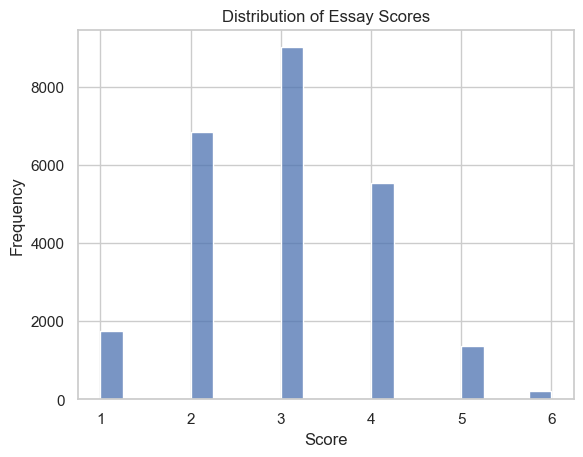

In [4]:
sns.histplot(df['score'], bins=20, kde=False)
plt.title("Distribution of Essay Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [5]:
df['word_count'] = df['full_text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['full_text'].apply(lambda x: len(str(x)))
df['avg_word_length'] = df['full_text'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]) if pd.notnull(x) and len(str(x).split()) > 0 else 0
)

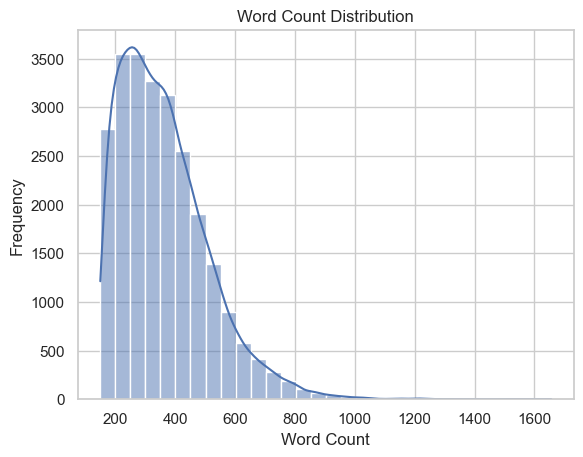

In [6]:
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


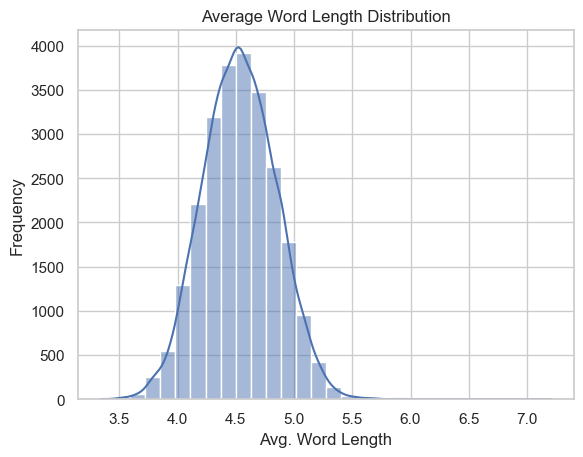

In [7]:
sns.histplot(df['avg_word_length'], bins=30, kde=True)
plt.title("Average Word Length Distribution")
plt.xlabel("Avg. Word Length")
plt.ylabel("Frequency")
plt.show()


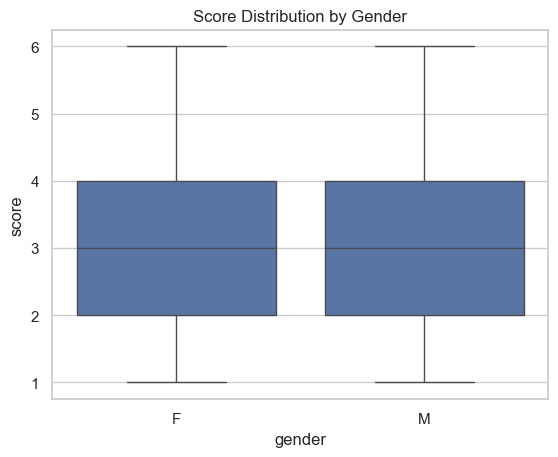

In [8]:
sns.boxplot(x='gender', y='score', data=df)
plt.title("Score Distribution by Gender")
plt.show()


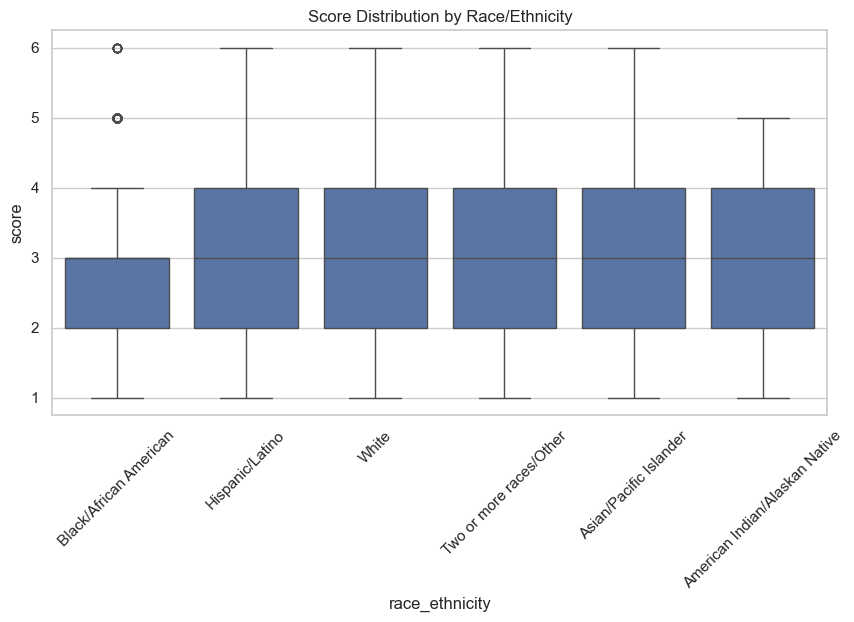

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='race_ethnicity', y='score', data=df)
plt.xticks(rotation=45)
plt.title("Score Distribution by Race/Ethnicity")
plt.show()


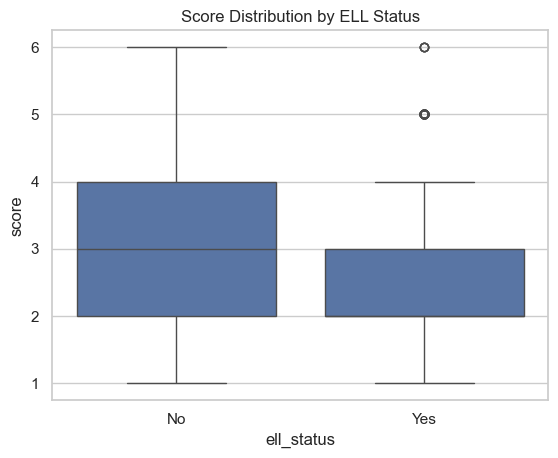

In [10]:
sns.boxplot(x='ell_status', y='score', data=df)
plt.title("Score Distribution by ELL Status")
plt.show()


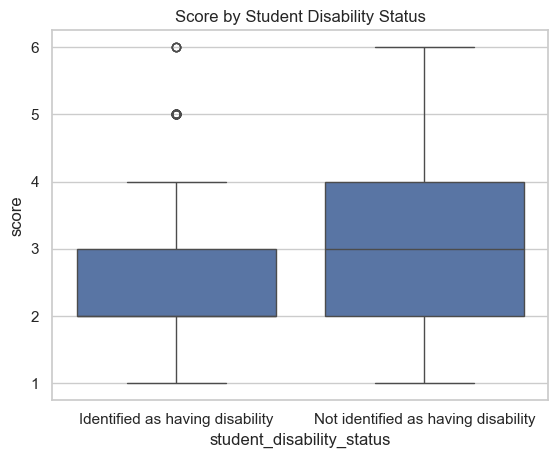

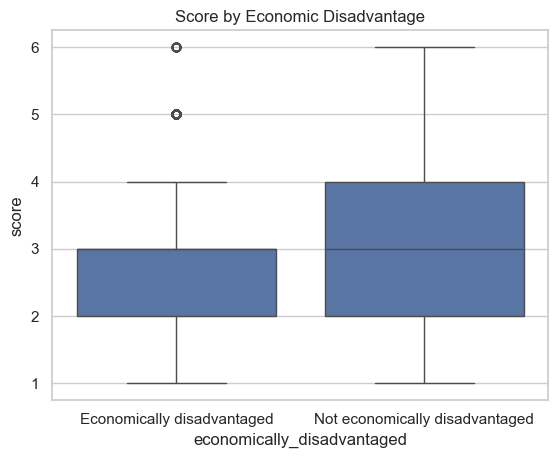

In [11]:
sns.boxplot(x='student_disability_status', y='score', data=df)
plt.title("Score by Student Disability Status")
plt.show()

sns.boxplot(x='economically_disadvantaged', y='score', data=df)
plt.title("Score by Economic Disadvantage")
plt.show()


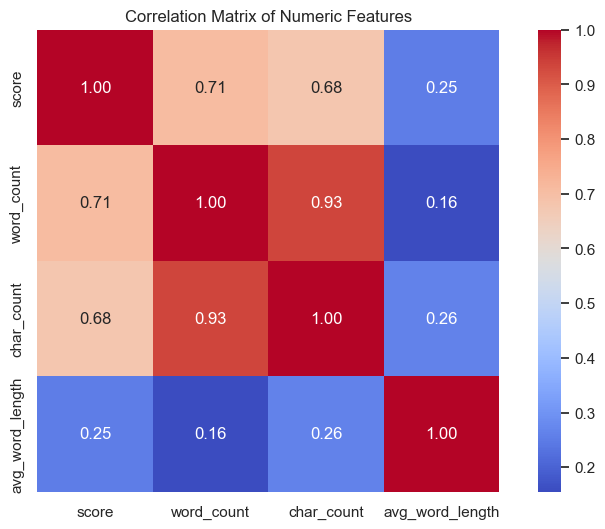

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()
